In [7]:
# Import required libraries
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.neighbors import kneighbors_graph, radius_neighbors_graph
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [8]:
# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Ground truth labels (3 classes)

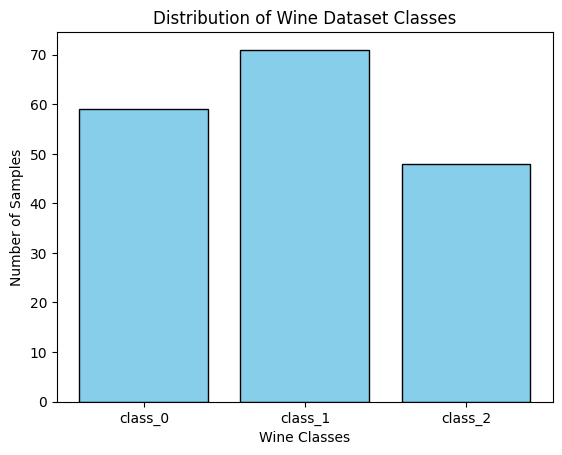

In [9]:
class_names = wine.target_names  # Class labels

# Count the number of samples in each class
unique_classes, class_counts = np.unique(y, return_counts=True)

# Plot the bar chart
plt.bar(class_names, class_counts, color='skyblue', edgecolor='black')
plt.title("Distribution of Wine Dataset Classes")
plt.xlabel("Wine Classes")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.show()

In [10]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Dimensionality reduction (optional, for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Means Clustering

In [12]:
# Function to visualize clusters
def visualize_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.colorbar(label='Cluster')
    plt.show()

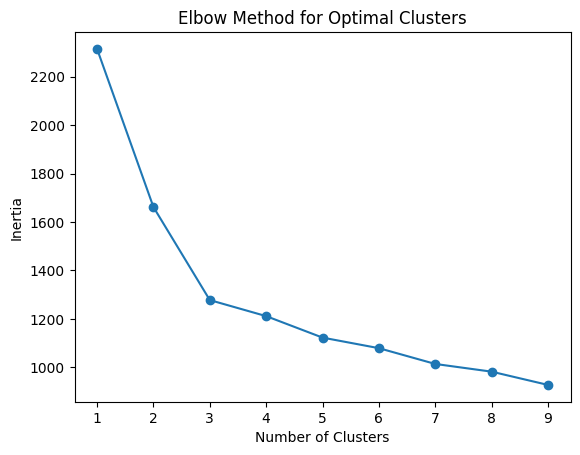

In [13]:
# Additional: Elbow Method to determine optimal number of clusters
inertia_values = []
n_clusters_range = range(1, 10)

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Experimenting with different number of clusters "n_clusters"

In [14]:
# Experiment with KMeans parameters
parameters1 = [
    {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100},
    {'n_clusters': 2, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100},
    {'n_clusters': 4, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100},
    {'n_clusters': 5, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100},
]

Parameters: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100}
Adjusted Rand Index (ARI): 0.8975
Normalized Mutual Information (NMI): 0.8759
Silhouette Score: 0.2849
Davies-Bouldin Index (DBI): 1.3892
--------------------------------------------------


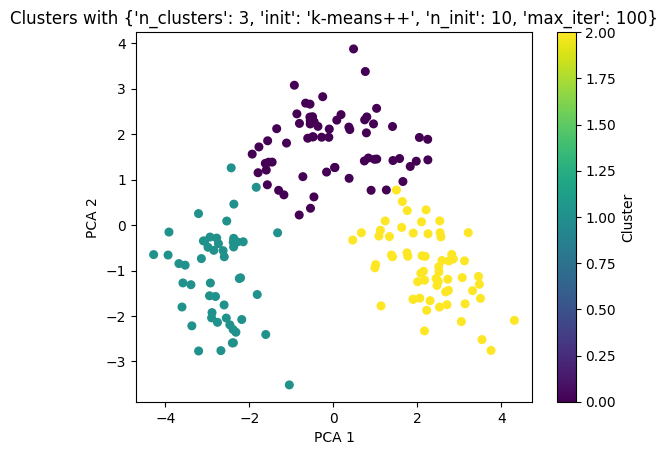

Parameters: {'n_clusters': 2, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100}
Adjusted Rand Index (ARI): 0.3743
Normalized Mutual Information (NMI): 0.4782
Silhouette Score: 0.2593
Davies-Bouldin Index (DBI): 1.5260
--------------------------------------------------


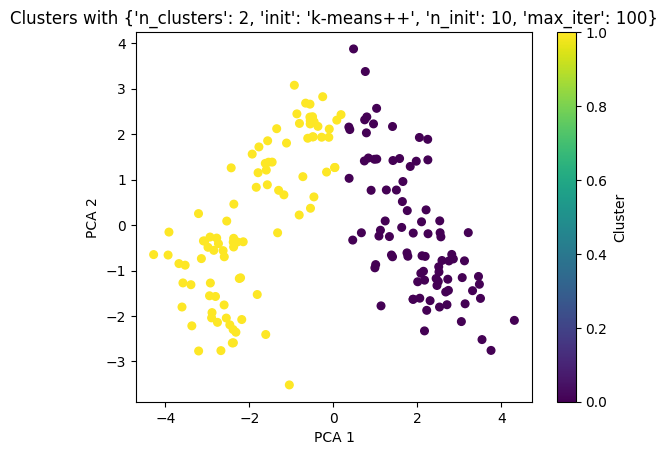

Parameters: {'n_clusters': 4, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100}
Adjusted Rand Index (ARI): 0.7646
Normalized Mutual Information (NMI): 0.8117
Silhouette Score: 0.2602
Davies-Bouldin Index (DBI): 1.7969
--------------------------------------------------


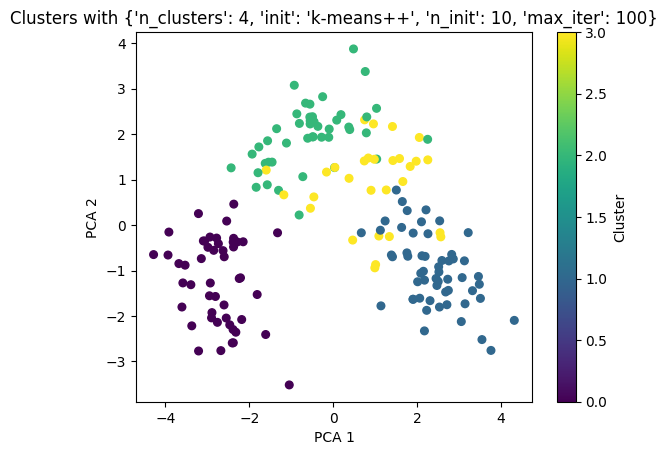

Parameters: {'n_clusters': 5, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100}
Adjusted Rand Index (ARI): 0.5991
Normalized Mutual Information (NMI): 0.6729
Silhouette Score: 0.2016
Davies-Bouldin Index (DBI): 1.8083
--------------------------------------------------


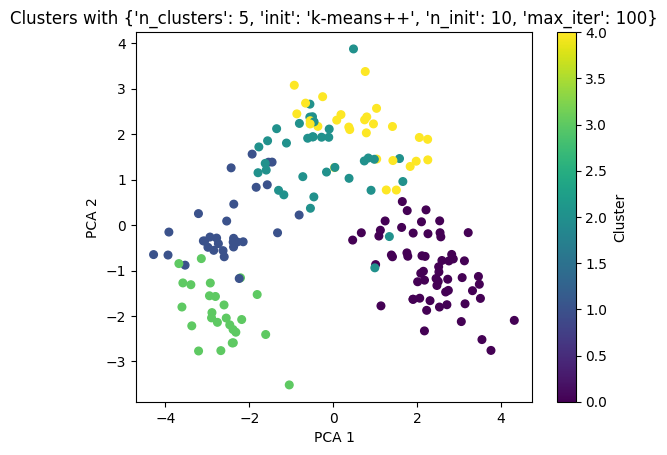

In [15]:
for param in parameters1:
    # Initialize and fit KMeans
    kmeans = KMeans(
        n_clusters=param['n_clusters'],
        init=param['init'],
        n_init=param['n_init'],
        max_iter=param['max_iter'],
        random_state=42
    )
    predicted_labels = kmeans.fit_predict(X_scaled)

    # Evaluation metrics
    ari = adjusted_rand_score(y, predicted_labels)
    nmi = normalized_mutual_info_score(y, predicted_labels)
    silhouette = silhouette_score(X_scaled, predicted_labels)
    dbi = davies_bouldin_score(X_scaled, predicted_labels)

    # Display results
    print(f"Parameters: {param}")
    print(f"Adjusted Rand Index (ARI): {ari:.4f}")
    print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Davies-Bouldin Index (DBI): {dbi:.4f}")
    print("-" * 50)

    # Visualize clusters (on PCA-reduced data)
    visualize_clusters(X_pca, predicted_labels, title=f"Clusters with {param}")


## Experimenting with different "n_init" values

In [16]:
# Experiment with KMeans parameters
parameters2 = [
    {'n_clusters': 3, 'init': 'k-means++', 'n_init': 5, 'max_iter': 100},
    {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100},
    {'n_clusters': 3, 'init': 'k-means++', 'n_init': 15, 'max_iter': 100},
    {'n_clusters': 3, 'init': 'k-means++', 'n_init': 20, 'max_iter': 100},
]

Parameters: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 5, 'max_iter': 100}
Adjusted Rand Index (ARI): 0.8975
Normalized Mutual Information (NMI): 0.8759
Silhouette Score: 0.2849
Davies-Bouldin Index (DBI): 1.3892
--------------------------------------------------


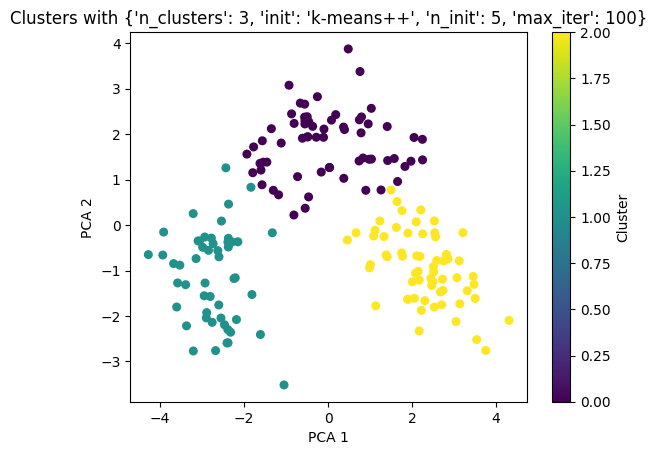

Parameters: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100}
Adjusted Rand Index (ARI): 0.8975
Normalized Mutual Information (NMI): 0.8759
Silhouette Score: 0.2849
Davies-Bouldin Index (DBI): 1.3892
--------------------------------------------------


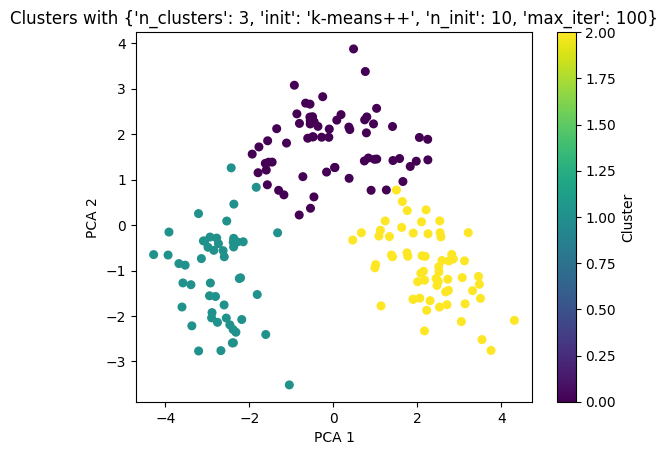

Parameters: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 15, 'max_iter': 100}
Adjusted Rand Index (ARI): 0.8975
Normalized Mutual Information (NMI): 0.8759
Silhouette Score: 0.2849
Davies-Bouldin Index (DBI): 1.3892
--------------------------------------------------


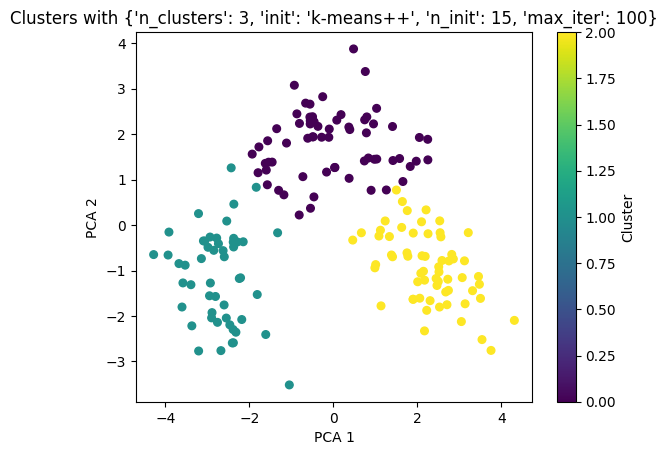

Parameters: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 20, 'max_iter': 100}
Adjusted Rand Index (ARI): 0.8975
Normalized Mutual Information (NMI): 0.8759
Silhouette Score: 0.2849
Davies-Bouldin Index (DBI): 1.3892
--------------------------------------------------


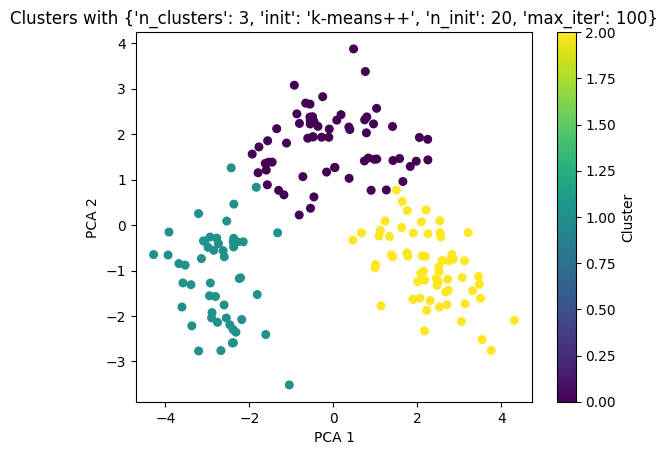

In [17]:
for param in parameters2:
    # Initialize and fit KMeans
    kmeans = KMeans(
        n_clusters=param['n_clusters'],
        init=param['init'],
        n_init=param['n_init'],
        max_iter=param['max_iter'],
        random_state=42
    )
    predicted_labels = kmeans.fit_predict(X_scaled)

    # Evaluation metrics
    ari = adjusted_rand_score(y, predicted_labels)
    nmi = normalized_mutual_info_score(y, predicted_labels)
    silhouette = silhouette_score(X_scaled, predicted_labels)
    dbi = davies_bouldin_score(X_scaled, predicted_labels)

    # Display results
    print(f"Parameters: {param}")
    print(f"Adjusted Rand Index (ARI): {ari:.4f}")
    print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Davies-Bouldin Index (DBI): {dbi:.4f}")
    print("-" * 50)

    # Visualize clusters (on PCA-reduced data)
    visualize_clusters(X_pca, predicted_labels, title=f"Clusters with {param}")


## Experimenting with different values of "init"

In [18]:
import numpy as np
# Create custom initial centroids (13 features)
initial_centroids = np.array([
    [0.5, -0.8, 0.7, 1.0, -1.2, 0.9, 0.3, 0.1, -0.5, 0.6, 0.2, -0.3, 0.8],
    [-1.5, 0.3, 0.9, -0.7, 0.5, -1.0, -0.3, -0.8, 0.4, -0.9, 0.7, 0.2, -0.5],
    [0.8, 1.0, -0.4, 0.5, -0.3, 0.7, 1.2, 0.3, 0.6, 0.9, -0.2, 0.4, 1.0]
])


In [19]:
# Experiment with KMeans parameters
parameters3 = [
    {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100},
    {'n_clusters': 3, 'init': 'random', 'n_init': 10, 'max_iter': 100},
    {'n_clusters': 3, 'init': initial_centroids, 'n_init': 10, 'max_iter': 100},  # Custom centroids
]

Parameters: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100}
Adjusted Rand Index (ARI): 0.8975
Normalized Mutual Information (NMI): 0.8759
Silhouette Score: 0.2849
Davies-Bouldin Index (DBI): 1.3892
--------------------------------------------------


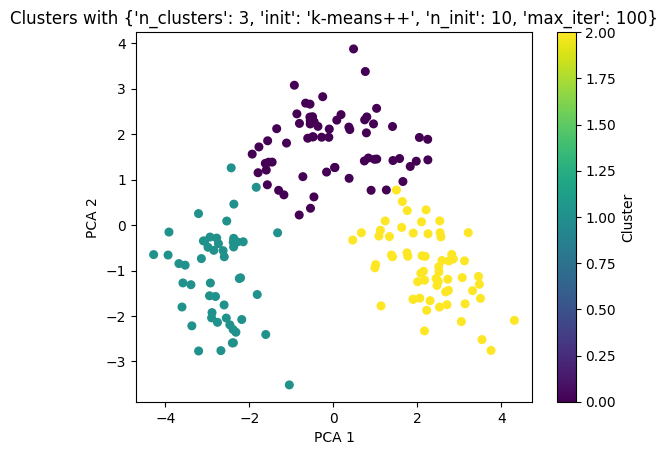

Parameters: {'n_clusters': 3, 'init': 'random', 'n_init': 10, 'max_iter': 100}
Adjusted Rand Index (ARI): 0.8975
Normalized Mutual Information (NMI): 0.8759
Silhouette Score: 0.2849
Davies-Bouldin Index (DBI): 1.3892
--------------------------------------------------


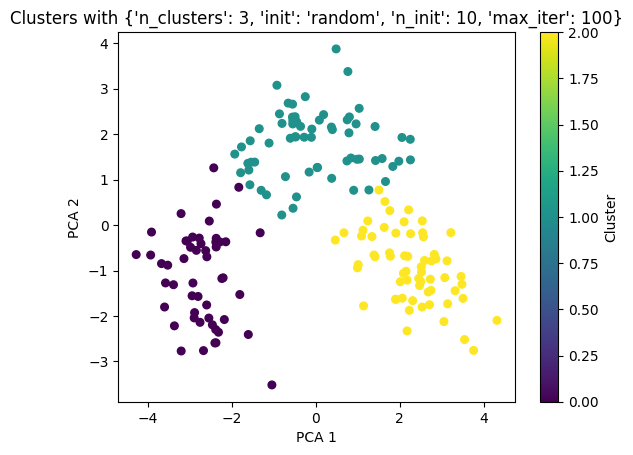

Parameters: {'n_clusters': 3, 'init': array([[ 0.5, -0.8,  0.7,  1. , -1.2,  0.9,  0.3,  0.1, -0.5,  0.6,  0.2,
        -0.3,  0.8],
       [-1.5,  0.3,  0.9, -0.7,  0.5, -1. , -0.3, -0.8,  0.4, -0.9,  0.7,
         0.2, -0.5],
       [ 0.8,  1. , -0.4,  0.5, -0.3,  0.7,  1.2,  0.3,  0.6,  0.9, -0.2,
         0.4,  1. ]]), 'n_init': 10, 'max_iter': 100}
Adjusted Rand Index (ARI): 0.8975
Normalized Mutual Information (NMI): 0.8759
Silhouette Score: 0.2849
Davies-Bouldin Index (DBI): 1.3892
--------------------------------------------------


/Users/romilpatel/ML-DS/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1431: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


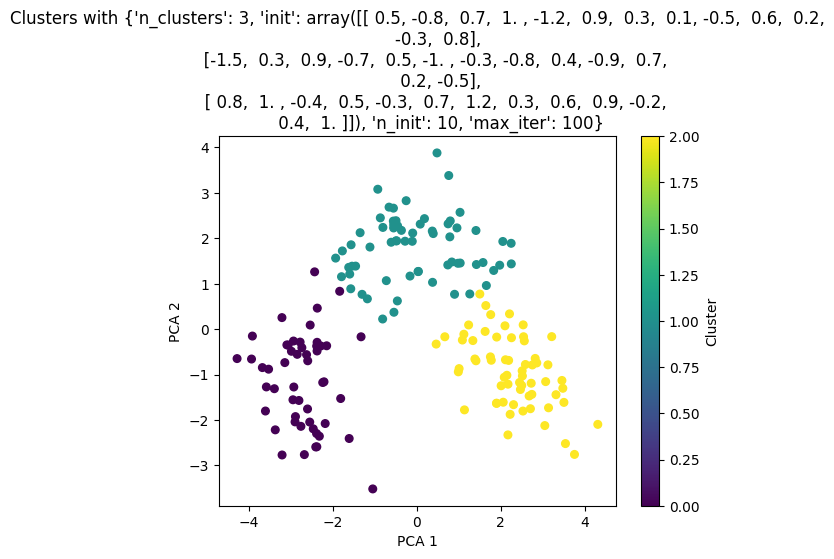

In [20]:
for param in parameters3:
    try:
        # Initialize and fit KMeans
        kmeans = KMeans(
            n_clusters=param['n_clusters'],
            init=param['init'],  # Pass the custom centroids directly
            n_init=param.get('n_init', 10),  # Handle custom init cases
            max_iter=param['max_iter'],
            random_state=42
        )
        predicted_labels = kmeans.fit_predict(X_scaled)

        # Evaluation metrics
        ari = adjusted_rand_score(y, predicted_labels)
        nmi = normalized_mutual_info_score(y, predicted_labels)
        silhouette = silhouette_score(X_scaled, predicted_labels)
        dbi = davies_bouldin_score(X_scaled, predicted_labels)

        # Display results
        print(f"Parameters: {param}")
        print(f"Adjusted Rand Index (ARI): {ari:.4f}")
        print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
        print(f"Silhouette Score: {silhouette:.4f}")
        print(f"Davies-Bouldin Index (DBI): {dbi:.4f}")
        print("-" * 50)

        # Visualize clusters (on PCA-reduced data)
        visualize_clusters(X_pca, predicted_labels, title=f"Clusters with {param}")
    except Exception as e:
        print(f"Error with parameters {param}: {e}")

## Experimenting with different values of "max_iter"

In [21]:
# Experiment with KMeans parameters
parameters4 = [
    {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10, 'max_iter': 5},
    {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10, 'max_iter': 10},
    {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10, 'max_iter': 15},
    {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10, 'max_iter': 20},
]

Parameters: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10, 'max_iter': 5}
Adjusted Rand Index (ARI): 0.8975
Normalized Mutual Information (NMI): 0.8759
Silhouette Score: 0.2849
Davies-Bouldin Index (DBI): 1.3892
--------------------------------------------------


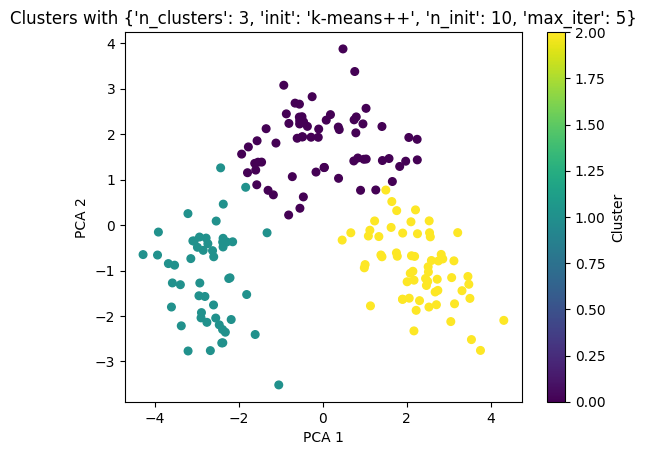

Parameters: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10, 'max_iter': 10}
Adjusted Rand Index (ARI): 0.8975
Normalized Mutual Information (NMI): 0.8759
Silhouette Score: 0.2849
Davies-Bouldin Index (DBI): 1.3892
--------------------------------------------------


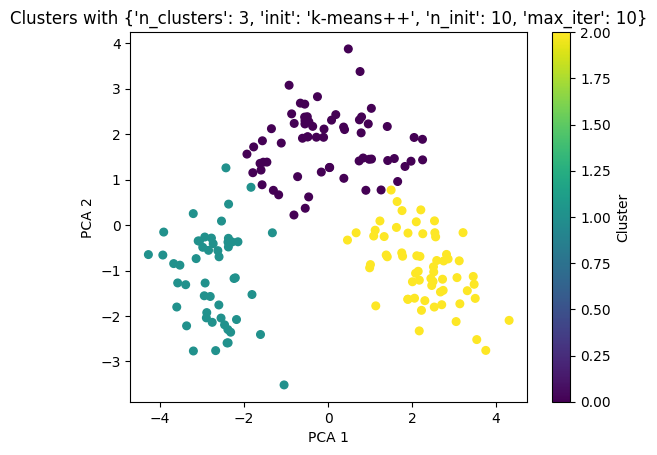

Parameters: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10, 'max_iter': 15}
Adjusted Rand Index (ARI): 0.8975
Normalized Mutual Information (NMI): 0.8759
Silhouette Score: 0.2849
Davies-Bouldin Index (DBI): 1.3892
--------------------------------------------------


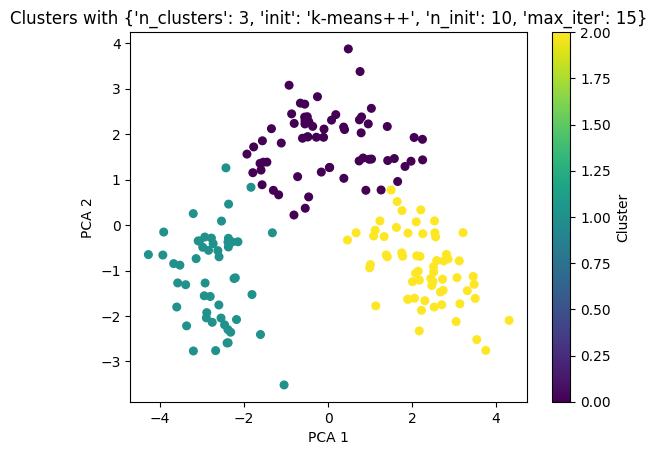

Parameters: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10, 'max_iter': 20}
Adjusted Rand Index (ARI): 0.8975
Normalized Mutual Information (NMI): 0.8759
Silhouette Score: 0.2849
Davies-Bouldin Index (DBI): 1.3892
--------------------------------------------------


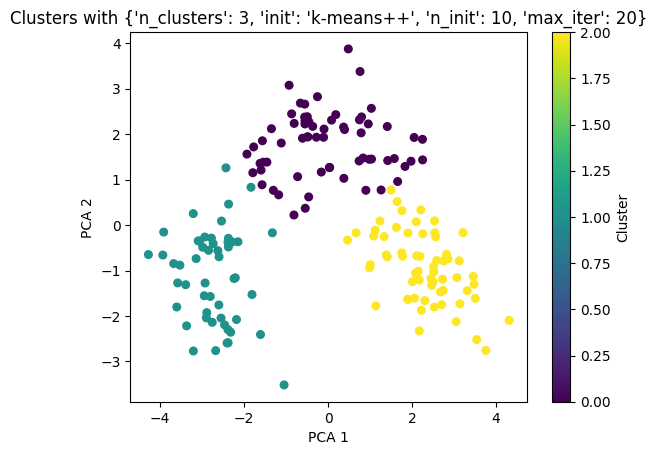

In [22]:
for param in parameters4:
    # Initialize and fit KMeans
    kmeans = KMeans(
        n_clusters=param['n_clusters'],
        init=param['init'],
        n_init=param['n_init'],
        max_iter=param['max_iter'],
        random_state=42
    )
    predicted_labels = kmeans.fit_predict(X_scaled)

    # Evaluation metrics
    ari = adjusted_rand_score(y, predicted_labels)
    nmi = normalized_mutual_info_score(y, predicted_labels)
    silhouette = silhouette_score(X_scaled, predicted_labels)
    dbi = davies_bouldin_score(X_scaled, predicted_labels)

    # Display results
    print(f"Parameters: {param}")
    print(f"Adjusted Rand Index (ARI): {ari:.4f}")
    print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Davies-Bouldin Index (DBI): {dbi:.4f}")
    print("-" * 50)

    # Visualize clusters (on PCA-reduced data)
    visualize_clusters(X_pca, predicted_labels, title=f"Clusters with {param}")


# Agglomerative Clustering

## Experimenting with different "connectivity" values 

In [23]:
# Define connectivity graphs
kneighbors_conn = kneighbors_graph(X_scaled, n_neighbors=10, include_self=False)
radius_conn1 = radius_neighbors_graph(X_scaled, radius=3.0, include_self=False)
radius_conn2 = radius_neighbors_graph(X_scaled, radius=4.0, include_self=False)

In [24]:
parameters1 = [
    {'n_clusters': 3, 'connectivity': None, 'metric': 'euclidean', 'linkage': 'ward'},   
    {'n_clusters': 3, 'connectivity': kneighbors_conn, 'metric': 'euclidean', 'linkage': 'ward'},  
    {'n_clusters': 3, 'connectivity': radius_conn1, 'metric': 'euclidean', 'linkage': 'ward'},   
    {'n_clusters': 3, 'connectivity': radius_conn2, 'metric': 'euclidean', 'linkage': 'ward'},   
]

Parameters: {'n_clusters': 3, 'connectivity': None, 'metric': 'euclidean', 'linkage': 'ward'}
Parameters: {'n_clusters': 3, 'connectivity': None, 'metric': 'euclidean', 'linkage': 'ward'}
  Adjusted Rand Index (ARI): 0.7899
  Normalized Mutual Information (NMI): 0.7865
  Silhouette Score: 0.2774
  Davies-Bouldin Index (DBI): 1.4186
--------------------------------------------------


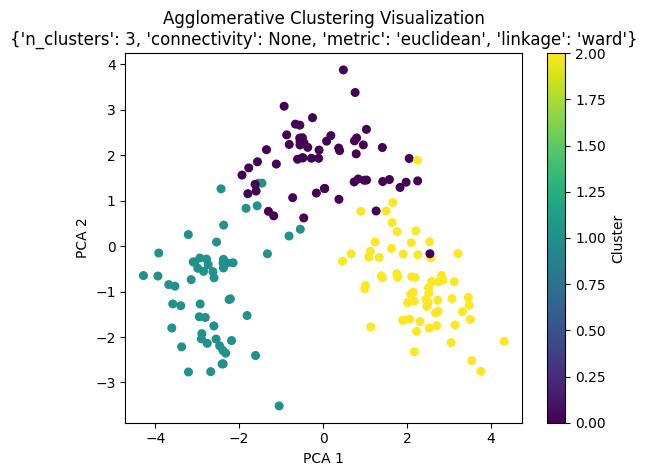

Parameters: {'n_clusters': 3, 'connectivity': <178x178 sparse matrix of type '<class 'numpy.float64'>'
	with 1780 stored elements in Compressed Sparse Row format>, 'metric': 'euclidean', 'linkage': 'ward'}
Parameters: {'n_clusters': 3, 'connectivity': <178x178 sparse matrix of type '<class 'numpy.float64'>'
	with 1780 stored elements in Compressed Sparse Row format>, 'metric': 'euclidean', 'linkage': 'ward'}
  Adjusted Rand Index (ARI): 0.7573
  Normalized Mutual Information (NMI): 0.7618
  Silhouette Score: 0.2748
  Davies-Bouldin Index (DBI): 1.3896
--------------------------------------------------


/Users/romilpatel/ML-DS/env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


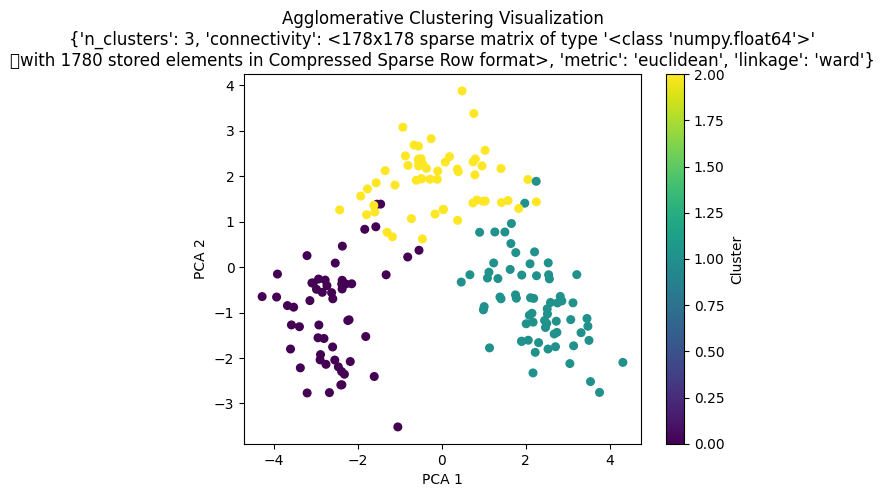

Parameters: {'n_clusters': 3, 'connectivity': <178x178 sparse matrix of type '<class 'numpy.float64'>'
	with 3600 stored elements in Compressed Sparse Row format>, 'metric': 'euclidean', 'linkage': 'ward'}
Parameters: {'n_clusters': 3, 'connectivity': <178x178 sparse matrix of type '<class 'numpy.float64'>'
	with 3600 stored elements in Compressed Sparse Row format>, 'metric': 'euclidean', 'linkage': 'ward'}
  Adjusted Rand Index (ARI): 0.7587
  Normalized Mutual Information (NMI): 0.7624
  Silhouette Score: 0.2776
  Davies-Bouldin Index (DBI): 1.3852
--------------------------------------------------


/Users/romilpatel/ML-DS/env/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:322: UserWarning: the number of connected components of the connectivity matrix is 8 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
/Users/romilpatel/ML-DS/env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


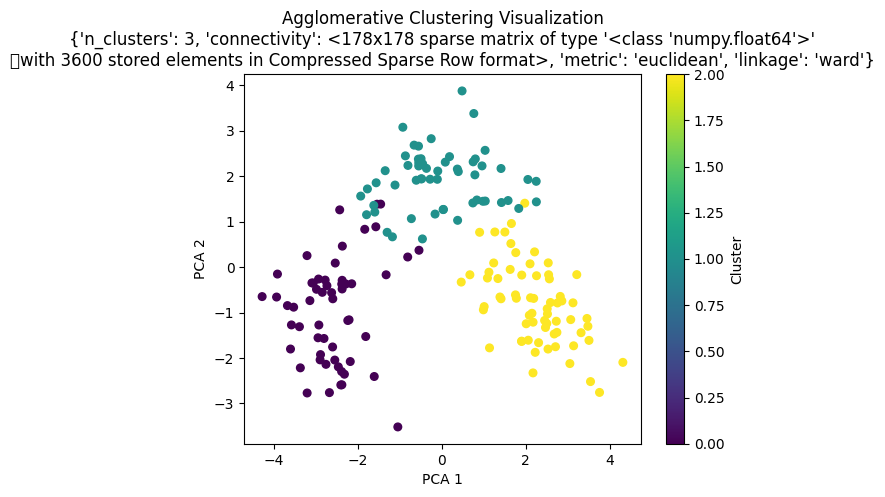

/Users/romilpatel/ML-DS/env/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:322: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


Parameters: {'n_clusters': 3, 'connectivity': <178x178 sparse matrix of type '<class 'numpy.float64'>'
	with 8950 stored elements in Compressed Sparse Row format>, 'metric': 'euclidean', 'linkage': 'ward'}
Parameters: {'n_clusters': 3, 'connectivity': <178x178 sparse matrix of type '<class 'numpy.float64'>'
	with 8950 stored elements in Compressed Sparse Row format>, 'metric': 'euclidean', 'linkage': 'ward'}
  Adjusted Rand Index (ARI): 0.7436
  Normalized Mutual Information (NMI): 0.7515
  Silhouette Score: 0.2754
  Davies-Bouldin Index (DBI): 1.3889
--------------------------------------------------


/Users/romilpatel/ML-DS/env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


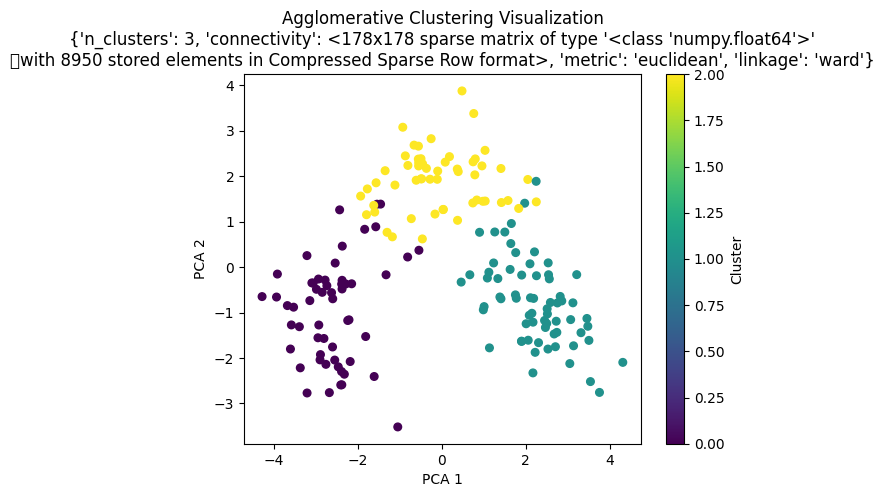

In [25]:
# Perform clustering and evaluate each configuration
for params in parameters1:
    print(f"Parameters: {params}")
    try:
        # Apply Agglomerative Clustering
        agg_clustering = AgglomerativeClustering(
            n_clusters=params['n_clusters'],
            connectivity=params['connectivity'],
            metric=params['metric'],
            linkage=params['linkage']
        )
        predicted_labels = agg_clustering.fit_predict(X_scaled)
        
        # Evaluate clustering quality
        ari = adjusted_rand_score(y, predicted_labels)
        nmi = normalized_mutual_info_score(y, predicted_labels)
        silhouette = silhouette_score(X_scaled, predicted_labels)
        dbi = davies_bouldin_score(X_scaled, predicted_labels)
        print(f"Parameters: {params}")
        print(f"  Adjusted Rand Index (ARI): {ari:.4f}")
        print(f"  Normalized Mutual Information (NMI): {nmi:.4f}")
        print(f"  Silhouette Score: {silhouette:.4f}")
        print(f"  Davies-Bouldin Index (DBI): {dbi:.4f}")
        print("-" * 50)

        # Visualize clustering
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, cmap='viridis', s=30)
        plt.title(f"Agglomerative Clustering Visualization\n{params}")
        plt.xlabel("PCA 1")
        plt.ylabel("PCA 2")
        plt.colorbar(label="Cluster")
        plt.show()

    except Exception as e:
        print(f"  Error with parameters {params}: {e}")

## Experimenting with different "metric" (affinity) values

In [26]:
parameters2 = [
    {'n_clusters': 3, 'connectivity': None, 'metric': 'euclidean', 'linkage': 'ward'},   
    {'n_clusters': 3, 'connectivity': None, 'metric': 'manhattan', 'linkage': 'complete'},  
    {'n_clusters': 3, 'connectivity': None, 'metric': 'cosine', 'linkage': 'complete'},    
    {'n_clusters': 3, 'connectivity': None, 'metric': 'chebyshev', 'linkage': 'complete'},  
]

Parameters: {'n_clusters': 3, 'connectivity': None, 'metric': 'euclidean', 'linkage': 'ward'}
Parameters: {'n_clusters': 3, 'connectivity': None, 'metric': 'euclidean', 'linkage': 'ward'}
  Adjusted Rand Index (ARI): 0.7899
  Normalized Mutual Information (NMI): 0.7865
  Silhouette Score: 0.2774
  Davies-Bouldin Index (DBI): 1.4186
--------------------------------------------------


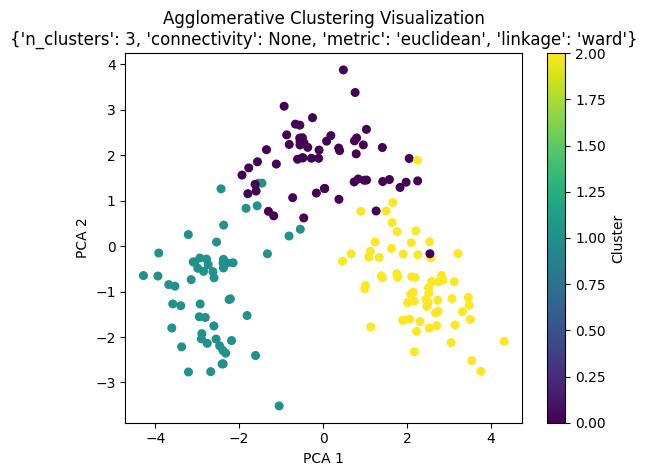

Parameters: {'n_clusters': 3, 'connectivity': None, 'metric': 'manhattan', 'linkage': 'complete'}
Parameters: {'n_clusters': 3, 'connectivity': None, 'metric': 'manhattan', 'linkage': 'complete'}
  Adjusted Rand Index (ARI): 0.4855
  Normalized Mutual Information (NMI): 0.6197
  Silhouette Score: 0.1899
  Davies-Bouldin Index (DBI): 1.8747
--------------------------------------------------


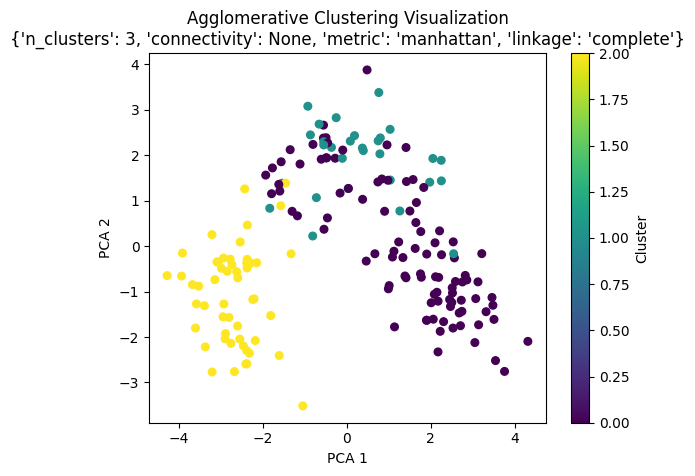

Parameters: {'n_clusters': 3, 'connectivity': None, 'metric': 'cosine', 'linkage': 'complete'}
Parameters: {'n_clusters': 3, 'connectivity': None, 'metric': 'cosine', 'linkage': 'complete'}
  Adjusted Rand Index (ARI): 0.5972
  Normalized Mutual Information (NMI): 0.6330
  Silhouette Score: 0.2443
  Davies-Bouldin Index (DBI): 1.5482
--------------------------------------------------


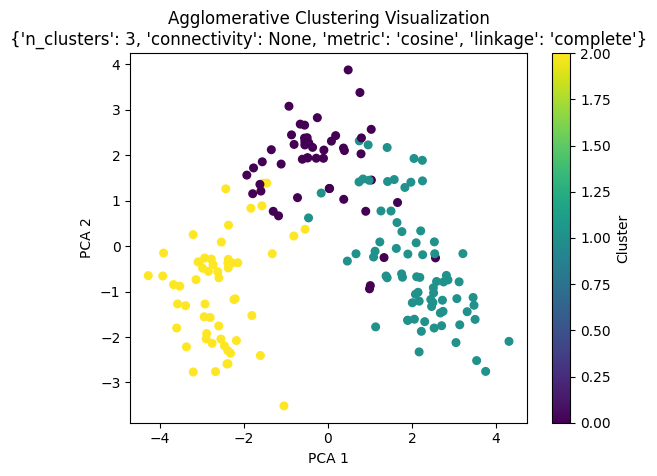

Parameters: {'n_clusters': 3, 'connectivity': None, 'metric': 'chebyshev', 'linkage': 'complete'}
Parameters: {'n_clusters': 3, 'connectivity': None, 'metric': 'chebyshev', 'linkage': 'complete'}
  Adjusted Rand Index (ARI): 0.0069
  Normalized Mutual Information (NMI): 0.1033
  Silhouette Score: 0.0590
  Davies-Bouldin Index (DBI): 2.7881
--------------------------------------------------


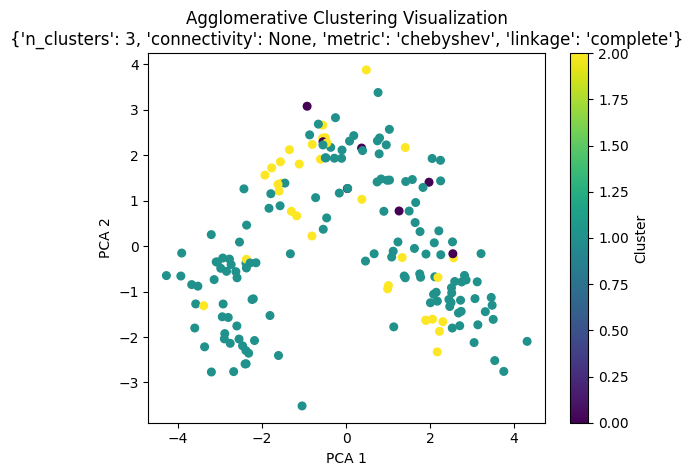

In [27]:
# Perform clustering and evaluate each configuration
for params in parameters2:
    print(f"Parameters: {params}")
    try:
        # Apply Agglomerative Clustering
        agg_clustering = AgglomerativeClustering(
            n_clusters=params['n_clusters'],
            connectivity=params['connectivity'],
            metric=params['metric'],
            linkage=params['linkage']
        )
        predicted_labels = agg_clustering.fit_predict(X_scaled)
        
        # Evaluate clustering quality
        ari = adjusted_rand_score(y, predicted_labels)
        nmi = normalized_mutual_info_score(y, predicted_labels)
        silhouette = silhouette_score(X_scaled, predicted_labels)
        dbi = davies_bouldin_score(X_scaled, predicted_labels)
        print(f"Parameters: {params}")
        print(f"  Adjusted Rand Index (ARI): {ari:.4f}")
        print(f"  Normalized Mutual Information (NMI): {nmi:.4f}")
        print(f"  Silhouette Score: {silhouette:.4f}")
        print(f"  Davies-Bouldin Index (DBI): {dbi:.4f}")
        print("-" * 50)

        # Visualize clustering
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, cmap='viridis', s=30)
        plt.title(f"Agglomerative Clustering Visualization\n{params}")
        plt.xlabel("PCA 1")
        plt.ylabel("PCA 2")
        plt.colorbar(label="Cluster")
        plt.show()

    except Exception as e:
        print(f"  Error with parameters {params}: {e}")

## Experimenting with different "linkage" values

In [28]:
parameters3 = [
    {'n_clusters': 3, 'connectivity': None, 'metric': 'euclidean', 'linkage': 'ward'},   
    {'n_clusters': 3, 'connectivity': None, 'metric': 'euclidean', 'linkage': 'complete'},  
    {'n_clusters': 3, 'connectivity': None, 'metric': 'euclidean', 'linkage': 'single'},   
    {'n_clusters': 3, 'connectivity': None, 'metric': 'euclidean', 'linkage': 'average'},   
]

Parameters: {'n_clusters': 3, 'connectivity': None, 'metric': 'euclidean', 'linkage': 'ward'}
Parameters: {'n_clusters': 3, 'connectivity': None, 'metric': 'euclidean', 'linkage': 'ward'}
  Adjusted Rand Index (ARI): 0.7899
  Normalized Mutual Information (NMI): 0.7865
  Silhouette Score: 0.2774
  Davies-Bouldin Index (DBI): 1.4186
--------------------------------------------------


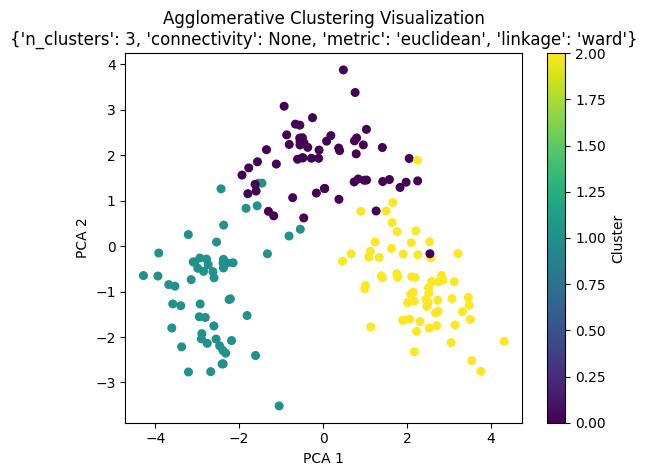

Parameters: {'n_clusters': 3, 'connectivity': None, 'metric': 'euclidean', 'linkage': 'complete'}
Parameters: {'n_clusters': 3, 'connectivity': None, 'metric': 'euclidean', 'linkage': 'complete'}
  Adjusted Rand Index (ARI): 0.5771
  Normalized Mutual Information (NMI): 0.6144
  Silhouette Score: 0.2038
  Davies-Bouldin Index (DBI): 1.8961
--------------------------------------------------


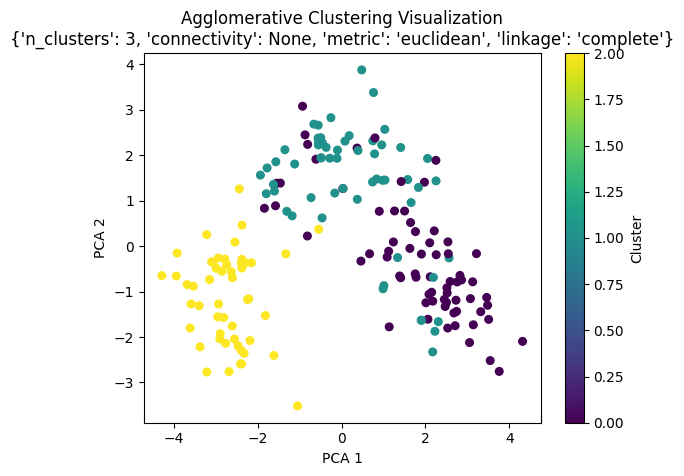

Parameters: {'n_clusters': 3, 'connectivity': None, 'metric': 'euclidean', 'linkage': 'single'}
Parameters: {'n_clusters': 3, 'connectivity': None, 'metric': 'euclidean', 'linkage': 'single'}
  Adjusted Rand Index (ARI): -0.0068
  Normalized Mutual Information (NMI): 0.0349
  Silhouette Score: 0.1827
  Davies-Bouldin Index (DBI): 0.9105
--------------------------------------------------


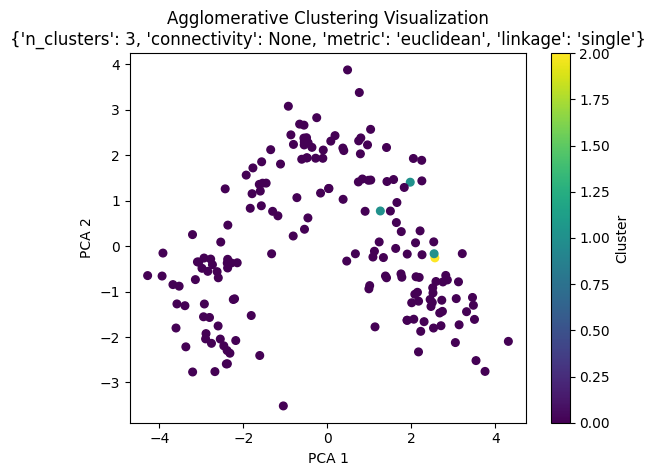

Parameters: {'n_clusters': 3, 'connectivity': None, 'metric': 'euclidean', 'linkage': 'average'}
Parameters: {'n_clusters': 3, 'connectivity': None, 'metric': 'euclidean', 'linkage': 'average'}
  Adjusted Rand Index (ARI): -0.0054
  Normalized Mutual Information (NMI): 0.0184
  Silhouette Score: 0.1575
  Davies-Bouldin Index (DBI): 1.0299
--------------------------------------------------


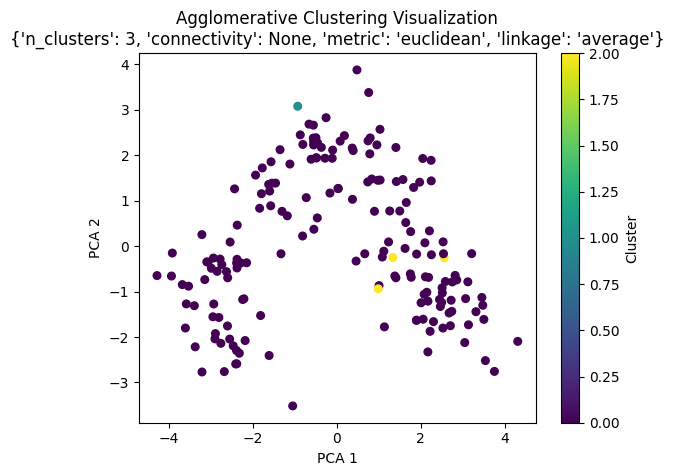

In [29]:
# Perform clustering and evaluate each configuration
for params in parameters3:
    print(f"Parameters: {params}")
    try:
        # Apply Agglomerative Clustering
        agg_clustering = AgglomerativeClustering(
            n_clusters=params['n_clusters'],
            connectivity=params['connectivity'],
            metric=params['metric'],
            linkage=params['linkage']
        )
        predicted_labels = agg_clustering.fit_predict(X_scaled)
        
        # Evaluate clustering quality
        ari = adjusted_rand_score(y, predicted_labels)
        nmi = normalized_mutual_info_score(y, predicted_labels)
        silhouette = silhouette_score(X_scaled, predicted_labels)
        dbi = davies_bouldin_score(X_scaled, predicted_labels)
        print(f"Parameters: {params}")
        print(f"  Adjusted Rand Index (ARI): {ari:.4f}")
        print(f"  Normalized Mutual Information (NMI): {nmi:.4f}")
        print(f"  Silhouette Score: {silhouette:.4f}")
        print(f"  Davies-Bouldin Index (DBI): {dbi:.4f}")
        print("-" * 50)

        # Visualize clustering
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, cmap='viridis', s=30)
        plt.title(f"Agglomerative Clustering Visualization\n{params}")
        plt.xlabel("PCA 1")
        plt.ylabel("PCA 2")
        plt.colorbar(label="Cluster")
        plt.show()

    except Exception as e:
        print(f"  Error with parameters {params}: {e}")